# Análisis Exploratorio de Datos para Clasificación de Plagas

En este notebook, realizaremos un análisis exploratorio de datos (EDA) de un conjunto de imágenes que representan diferentes tipos de plagas en hojas de tomate. Este análisis nos ayudará a entender mejor nuestros datos antes de proceder con el preprocesamiento y el entrenamiento del modelo YOLOv8.

## 1. Importación de Librerías

Primero, importamos las librerías necesarias para el análisis de los datos.


In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

## 2. Configuración de Directorios y Variables

Configuramos las rutas a los directorios donde se encuentran nuestras imágenes sin procesar (`data/raw`). También obtenemos las clases (etiquetas) de las imágenes, que corresponden a los diferentes tipos de plagas.


In [2]:
# Configuración de rutas
data_dir = "../data/raw"
processed_dir = "../data/processed"
classes = os.listdir(data_dir)
print(f"Clases encontradas: {classes}")

Clases encontradas: ['Potato_healthy', 'Tomato_Late_blight', 'Pepper_bell_Bacterial_spot', 'Tomato_healthy', 'Pepper_bell_healthy', 'Potato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot', 'Tomato_Tomato_YellowLeaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Target_Spot', 'Tomato_Early_blight', 'Potato_Early_blight', 'Tomato_Septoria_leaf_spot']


## 3. Exploración de las Clases

Visualizamos la distribución de las imágenes entre las diferentes clases para identificar posibles desequilibrios que podrían requerir técnicas de balanceo de datos.


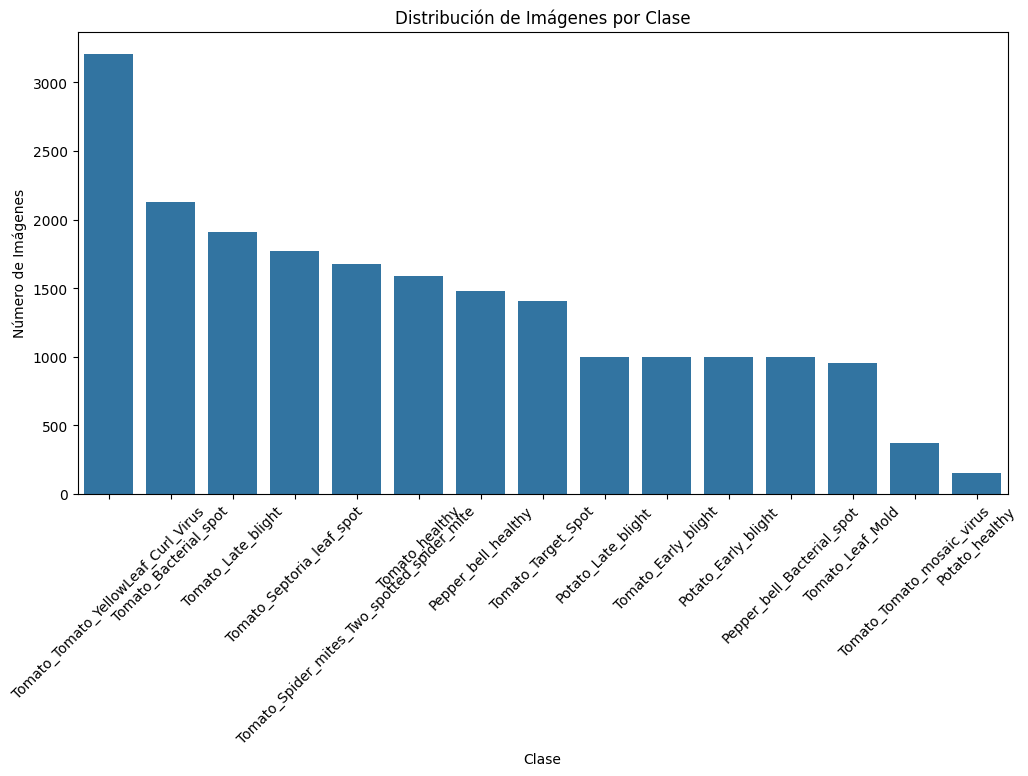

In [4]:
# Calcular la cantidad de imágenes por clase
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Clase', 'Número de Imágenes'])

# Ordenar el DataFrame por 'Número de Imágenes' en orden descendente
class_counts_df = class_counts_df.sort_values(by='Número de Imágenes', ascending=False)

# Gráfico de barras para la distribución de las clases
plt.figure(figsize=(12, 6))
sns.barplot(x='Clase', y='Número de Imágenes', data=class_counts_df)
plt.xticks(rotation=45)
plt.title('Distribución de Imágenes por Clase')
plt.show()

## 4. Visualización de Imágenes de Muestra

Es importante observar una muestra de las imágenes para asegurarnos de que los datos son adecuados para el entrenamiento y para detectar cualquier anomalía visual.

In [ ]:
# Visualización de imágenes aleatorias de cada clase
fig, axes = plt.subplots(len(classes), 5, figsize=(15, 20))
for i, cls in enumerate(classes):
    class_images = os.listdir(os.path.join(data_dir, cls))
    sample_images = np.random.choice(class_images, 5, replace=False)
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(data_dir, cls, img_name)
        image = Image.open(img_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(cls, fontsize=10)
plt.tight_layout()
plt.show()

## 5. Análisis de Dimensiones de Imágenes

Revisamos las dimensiones de las imágenes para determinar si hay una variabilidad significativa en el tamaño que pueda afectar el rendimiento del modelo.

In [ ]:
# Recolección de tamaños de imagen
image_sizes = []
for cls in classes:
    class_images = os.listdir(os.path.join(data_dir, cls))
    for img_name in class_images:
        img_path = os.path.join(data_dir, cls, img_name)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

# Distribución de tamaños de imágenes
sizes_df = pd.DataFrame(image_sizes, columns=['Ancho', 'Alto'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ancho', y='Alto', data=sizes_df)
plt.title('Distribución de Dimensiones de Imágenes')
plt.show()

## 6. Estadísticas Básicas de Imágenes

Calculamos algunas estadísticas básicas como el tamaño promedio de las imágenes y las resoluciones más comunes. Esto nos ayudará a decidir si necesitamos redimensionar las imágenes antes del entrenamiento.

In [ ]:
# Análisis de dimensiones promedio y resolución
print(f"Dimensión promedio de las imágenes: {sizes_df.mean().values}")
print(f"Resolución más común: {sizes_df.mode().values[0]}")

## 7. Análisis de la Calidad de las Imágenes

Evaluamos la calidad de las imágenes en términos de brillo. Un bajo brillo o un brillo inconsistente podría afectar el rendimiento del modelo y puede requerir un preprocesamiento adicional.

In [ ]:
# Función para calcular el brillo de una imagen
def calculate_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return np.mean(image)

# Ejemplo de cálculo del brillo promedio por clase
brightness_values = []
for cls in classes:
    class_images = os.listdir(os.path.join(data_dir, cls))
    sample_image = os.path.join(data_dir, cls, class_images[0])
    brightness = calculate_brightness(sample_image)
    brightness_values.append((cls, brightness))

brightness_df = pd.DataFrame(brightness_values, columns=['Clase', 'Brillo Promedio'])
print(brightness_df)

## 8. Conclusiones

- **Distribución de Clases:** Identificamos un posible desequilibrio en la distribución de las clases, lo que podría requerir técnicas de aumento de datos.
- **Calidad de Imágenes:** Existen variaciones en la calidad de las imágenes que podrían influir en el entrenamiento del modelo.
- **Próximos Pasos:** Considerar técnicas de aumento de datos y normalización de imágenes.

Este análisis proporciona una base sólida para avanzar en el preprocesamiento de los datos y el entrenamiento del modelo YOLOv8.